# **Laporan Praktikum Pertemuan 7 - Filter Spasial Low Pass Filter, High Pass filter, Point Detection, Line Detection, Edge Detection**
---


> Nama: Zahra Annisa Wahono
>
> Kelas: TI-3H / 29
>
> NIM: 2141720016

# **PRAKTIKUM FILTER**

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.

2. Berikut merupakan langkah-langkah yang dapat dilakukan:

    a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.

b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [ ]:
from google.colab import drive


# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.


### **Konvolusi tanpa Library**


**Membuat fungsi konvolusi**
Fungsi konvolusi yang dibuat memiliki parameter berupa:
1. citra masukan,
2. kernel berupa matriks untuk memfilter citra,
3. nilai stride/besarnya pergeseran untuk setiap konvolusi,
4. nilai pad yang akan ditambahkan pada citra

```
def convolution2d(image, kernel, stride, padding):
```

d. Load citra yang akan diproses dan ubah menjadi citra keabuan


```
img = cv.imread('/content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
```



e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:
```
#image sharpen
kernel_sharpen = np.array([[0,-1,0],
                          [-1,5,-1],
                          [0,-1,0]])
```

f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

  
  Memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan

```
convolution2d(img_gray,kernel_sharpen,1,2)
```

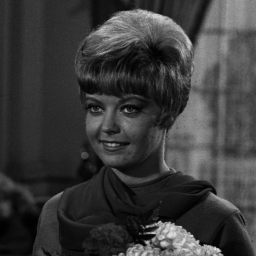

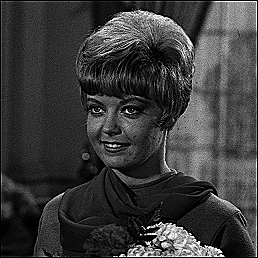

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Hitung dimensi dari matriks hasil
    output_height = (image_height - kernel_height + 2 * padding) // stride + 1
    output_width = (image_width - kernel_width + 2 * padding) // stride + 1

    output = np.zeros((output_height, output_width), dtype=np.float32)

    # Terapkan padding pada citra masukan
    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Lakukan konvolusi
    for x in range(0, output_height):
        for y in range(0, output_width):
            # Tentukan region of interest (ROI) pada citra yang telah dipad
            row_start = x * stride
            row_end = row_start + kernel_height
            col_start = y * stride
            col_end = col_start + kernel_width

            # Ekstrak ROI dari citra yang telah dipad
            roi = padded_image[row_start:row_end, col_start:col_end]

            # Lakukan konvolusi dengan perkalian elemen dan penjumlahan
            convolution_result = np.sum(roi * kernel)

            output[x, y] = convolution_result

    return output

img = cv.imread('/content/drive/MyDrive/Semester 5/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Image sharpen
kernel_sharpen = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])

# Call the convolution function
result = convolution2d(img_gray, kernel_sharpen, stride=1, padding=2)

# Display the original image
cv2_imshow(img_gray)

# Display the result of convolution
cv2_imshow(result)


3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

Average Filter (Mean Filter):

Original


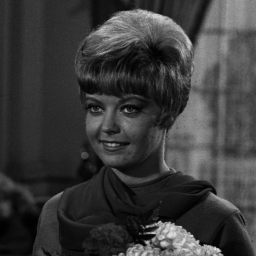

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

# Fungsi konvolusi 2D (seperti yang Anda berikan)
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Hitung dimensi dari matriks hasil
    output_height = (image_height - kernel_height + 2 * padding) // stride + 1
    output_width = (image_width - kernel_width + 2 * padding) // stride + 1

    output = np.zeros((output_height, output_width), dtype=np.float32)

    # Terapkan padding pada citra masukan
    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Lakukan konvolusi
    for x in range(0, output_height):
        for y in range(0, output_width):
            # Tentukan region of interest (ROI) pada citra yang telah dipad
            row_start = x * stride
            row_end = row_start + kernel_height
            col_start = y * stride
            col_end = col_start + kernel_width

            # Ekstrak ROI dari citra yang telah dipad
            roi = padded_image[row_start:row_end, col_start:col_end]

            # Lakukan konvolusi dengan perkalian elemen dan penjumlahan
            convolution_result = np.sum(roi * kernel)

            output[x, y] = convolution_result

    return output


# Load citra masukan dan konversi ke grayscale
img = cv.imread('/content/drive/MyDrive/Semester 5/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

print("Original")
cv2_imshow(img_gray)  # Citra asli

Filter Average


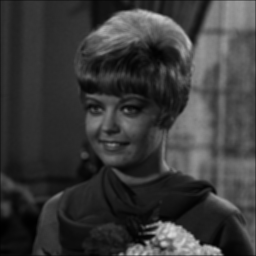

Filter Low Pass


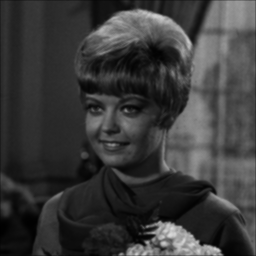

Filter High Pass


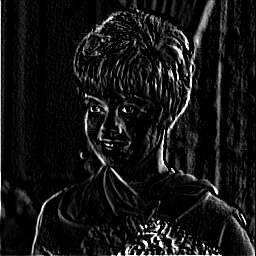

In [ ]:
# Filter Average
kernel_average = np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]]) / 9.0
result_average = convolution2d(img_gray, kernel_average, stride=1, padding=1)

# Filter Low Pass
kernel_low_pass = np.array([[1, 1, 1],
                            [1, 4, 1],
                            [1, 1, 1]]) / 12.0
result_low_pass = convolution2d(img_gray, kernel_low_pass, stride=1, padding=1)

# Filter High Pass
kernel_high_pass = np.array([[-1, 0, 1],
                             [-1, 0, 3],
                             [-3, 0, 1]])
result_high_pass = convolution2d(img_gray, kernel_high_pass, stride=1, padding=1)

print("Filter Average")
cv2_imshow(result_average)

print("Filter Low Pass")
cv2_imshow(result_low_pass)

print("Filter High Pass")
cv2_imshow(result_high_pass)

Filter Sharpen


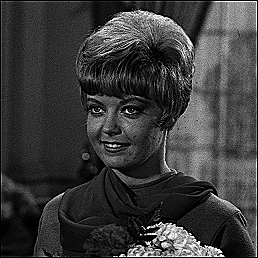

In [ ]:
# Filter sharpen
kernel_sharpen = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])
result_sharpen = convolution2d(img_gray, kernel_sharpen, stride=1, padding=2)
print("Filter Sharpen")
cv2_imshow(result_sharpen)  # Hasil filter sharpen

Filter emboss


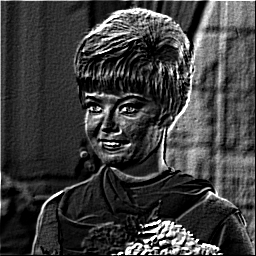

In [ ]:
# Filter emboss
kernel_emboss = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
result_emboss = convolution2d(img_gray, kernel_emboss, stride=1, padding=1)
print("Filter emboss")
cv2_imshow(result_emboss)  # Hasil filter emboss

Left Sobel Edge Detection


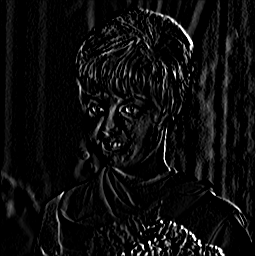

In [ ]:
# Filter Left Sobel Edge Detection
kernel_sobel = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])
result_sobel = convolution2d(img_gray, kernel_sobel, stride=1, padding=1)
print("Left Sobel Edge Detection")
cv2_imshow(result_sobel)  # Hasil filter Sobel

Filter Canny Edge Detection


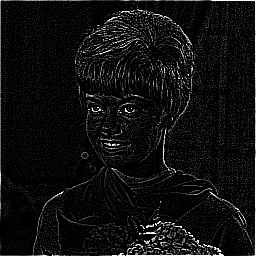

In [ ]:
# Filter Canny Edge Detection
kernel_canny = np.array([[-1, -1, -1],
                         [-1, 8, -1],
                         [-1, -1, -1]])
result_canny = convolution2d(img_gray, kernel_canny, stride=1, padding=1)
print("Filter Canny Edge Detection")
cv2_imshow(result_canny)  # Hasil filter Canny

Filter Prewitt Edge Detection


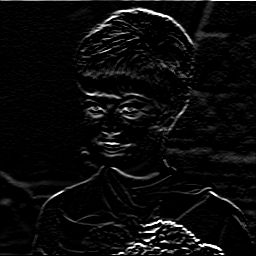

In [ ]:
# Filter Prewitt Edge Detection
kernel_prewitt = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])
result_prewitt = convolution2d(img_gray, kernel_prewitt, stride=1, padding=1)
print("Filter Prewitt Edge Detection")
cv2_imshow(result_prewitt)  # Hasil filter Prewitt

5x5 Gaussian Blur


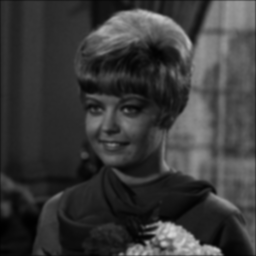

In [ ]:
# 5x5 Gaussian Blur
kernel_gaussian_5x5 = np.array([[1, 4, 6, 4, 1],
                                [4, 16, 24, 16, 4],
                                [6, 24, 36, 24, 6],
                                [4, 16, 24, 16, 4],
                                [1, 4, 6, 4, 1]]) / 256.0
result_gaussian_5x5 = convolution2d(img_gray, kernel_gaussian_5x5, stride=1, padding=2)
print("5x5 Gaussian Blur")
cv2_imshow(result_gaussian_5x5)  # Hasil filter Gaussian 5x5

21x21 Gaussian Blur


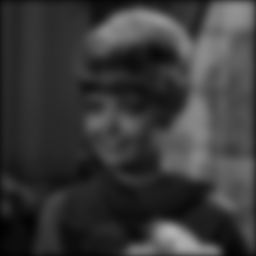

In [ ]:
# 21x21 Gaussian Blur
import math
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()
result_gaussian_21x21 = convolution2d(img_gray, gauss_kernel, stride=1, padding=10)
print("21x21 Gaussian Blur")
cv2_imshow(result_gaussian_21x21)  # Hasil filter Gaussian 21x21

# **TUGAS**
Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui
implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan
operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

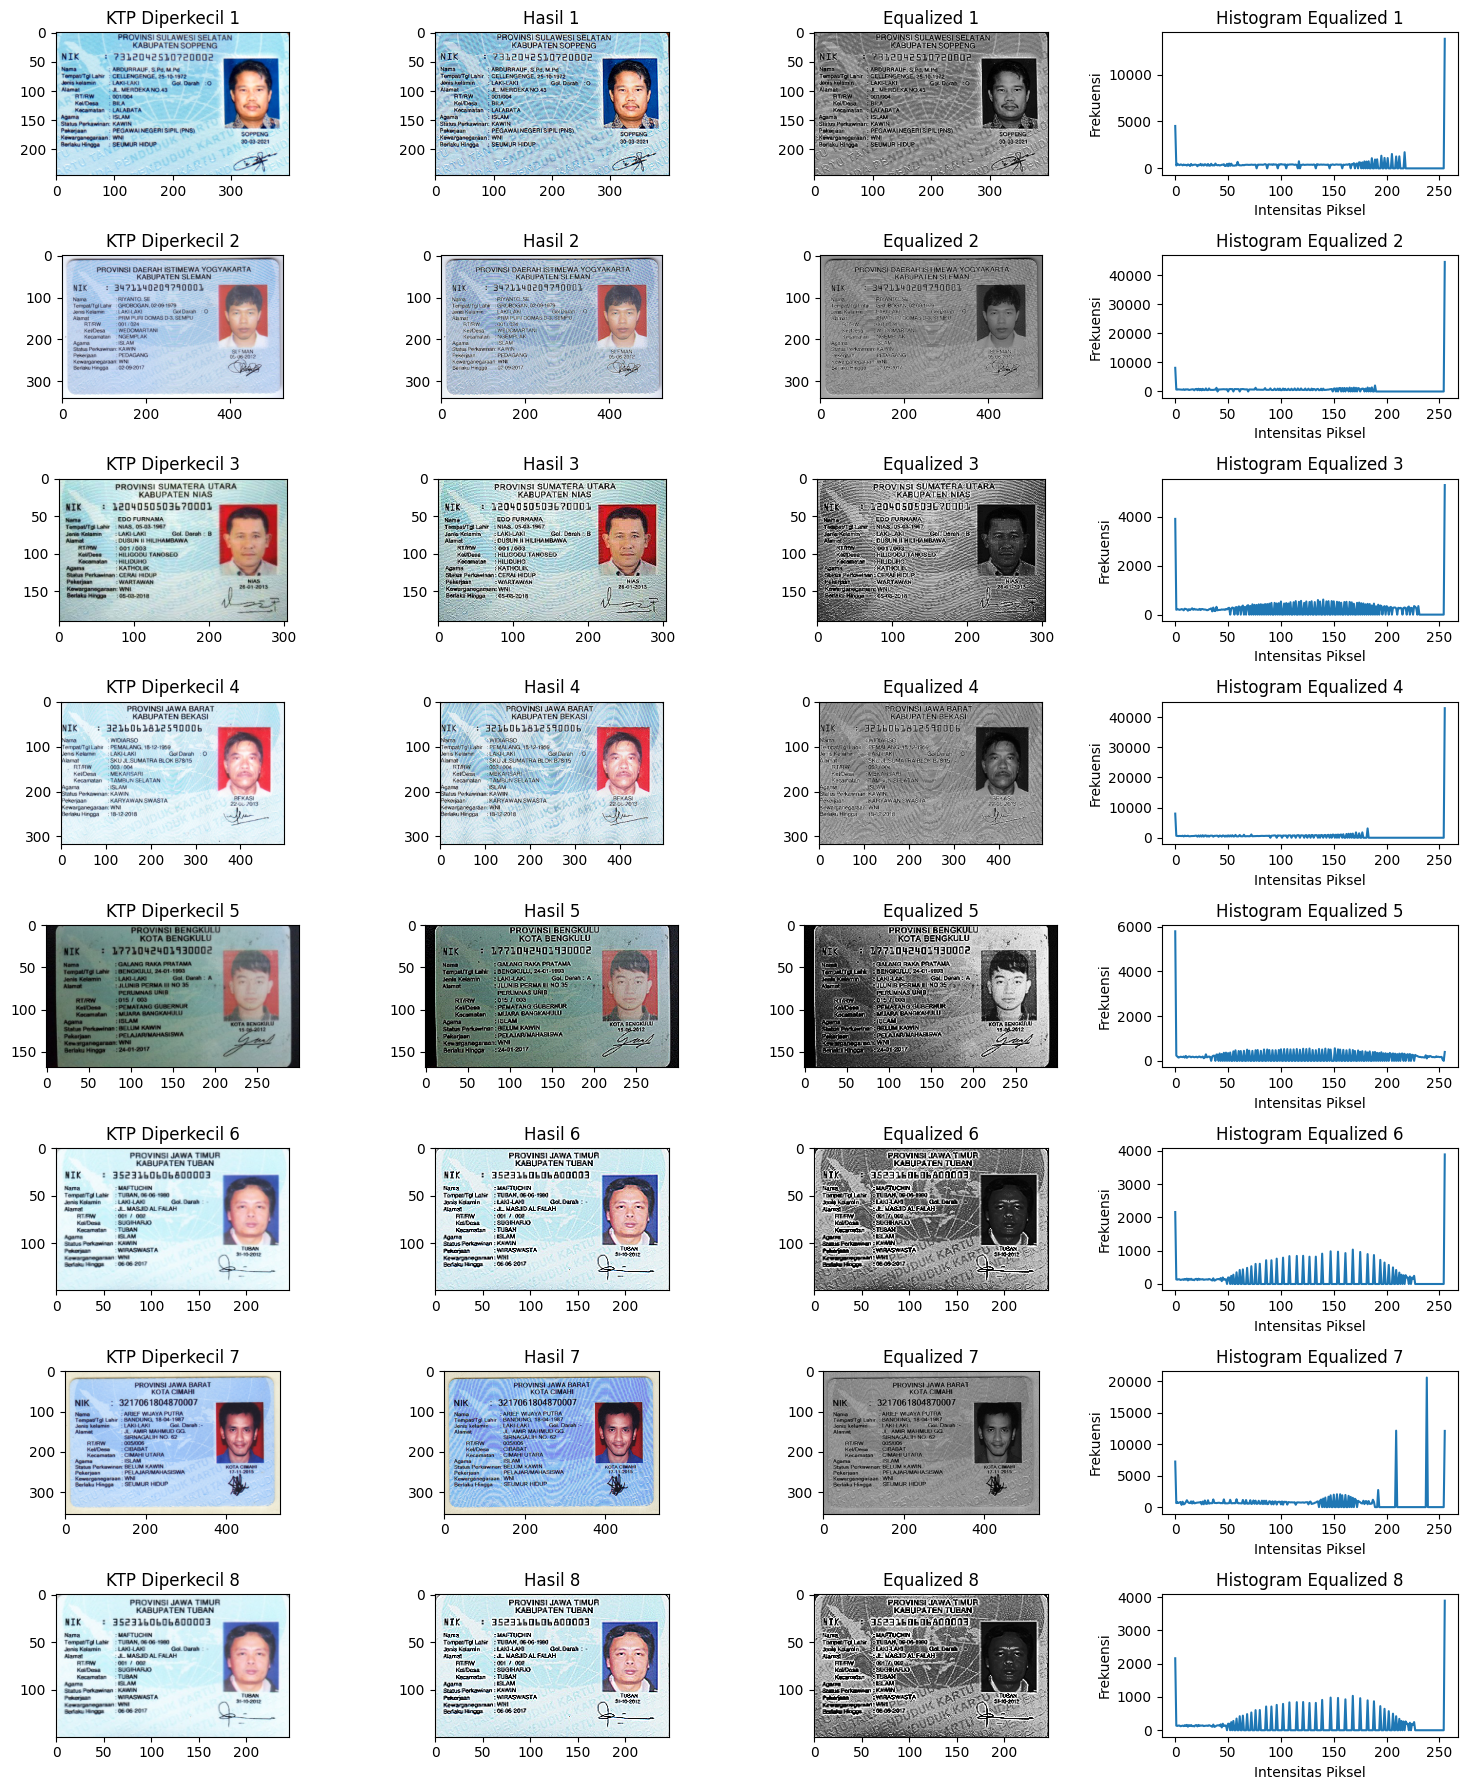

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

folder_path = '/content/drive/MyDrive/Semester 5/PCVK/Minggu 7/KTP_More/'

# Dapatkan daftar file citra dalam folder
ktp_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Fungsi untuk penyesuaian kecerahan
def Brightness(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)
    v = np.clip(v, 0, 255)
    hsv = cv2.merge((h, s, v))
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Kernel untuk mengasah gambar
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])


# Buat grid untuk menampilkan gambar
num_rows = len(ktp_files)
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Iterasi melalui gambar-gambar KTP
for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join(folder_path, ktp_file)
    ktp_image = cv2.imread(ktp_path)

    # Ubah ukuran gambar KTP
    ktp_image_resized = cv2.resize(ktp_image, (0, 0), fx=0.5, fy=0.5)

    # Terapkan penyesuaian Brightness
    brightness_adjusted = Brightness(ktp_image_resized, -10)

    # Terapkan Sharpen
    result = cv2.filter2D(brightness_adjusted, -1, kernel_sharpen)

    # Lakukan histogram equalization
    result_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    result_equalized = cv2.equalizeHist(result_gray)
    result_equalized_color = cv2.cvtColor(result_equalized, cv2.COLOR_GRAY2BGR)

    # Tampilkan gambar asli dengan label
    axs[i, 0].imshow(cv2.cvtColor(ktp_image_resized, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'KTP Diperkecil {i+1}')

    # Tampilkan gambar yang telah diolah dengan label
    axs[i, 1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB,))
    axs[i, 1].set_title(f'Hasil {i+1}')

    # Tampilkan gambar hasil equalisasi dengan label
    axs[i, 2].imshow(cv2.cvtColor(result_equalized_color, cv2.COLOR_BGR2RGB))
    axs[i, 2].set_title(f'Equalized {i+1}')

    # Hitung histogram gambar hasil equalisasi
    hist_equalized = cv2.calcHist([result_equalized], [0], None, [256], [0, 256])

    # Tampilkan histogram pada kolom ke-4 dengan label
    axs[i, 3].plot(hist_equalized)
    axs[i, 3].set_title(f'Histogram Equalized {i+1}')
    axs[i, 3].set_xlabel('Intensitas Piksel')
    axs[i, 3].set_ylabel('Frekuensi')

# Tampilkan hasil keseluruhan
plt.tight_layout()
plt.show()